In [ ]:
#!pip install pandas scikit-learn sentence_transformers ipywidgets nltk matplotlib

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re
import nltk
import matplotlib.pyplot as plt

In [ ]:
# Adjustmet part
# Number of samples from Dataframe
sample =300000
# Number of topics
components = 6

In [ ]:

df = pd.read_csv('emails.csv')
df = df.sample(sample).reset_index()

In [ ]:
# Perform any necessary text preprocessing (e.g., lowercasing, removing stop words, etc.)
print(df.head())
print(df.isnull().sum()) # Check for missing values
df['message'] = df['message'].fillna('') # Replace NaN values with empty strings
print(df['file'].nunique()) # Remove unnecessary columns
df = df[['message', 'file']] # Check the number of unique files
df = df.drop_duplicates() # Drop duplicates

    index                             file  \
0  225037             kaminski-v/sent/348.   
1  306623       mann-k/all_documents/3726.   
2   56593  dasovich-j/all_documents/11095.   
3   51787       causholli-m/sent_items/94.   
4  356676               parks-j/inbox/433.   

                                             message  
0  Message-ID: <20694289.1075856443747.JavaMail.e...  
1  Message-ID: <25787809.1075845667297.JavaMail.e...  
2  Message-ID: <4108063.1075843427720.JavaMail.ev...  
3  Message-ID: <16112889.1075853167543.JavaMail.e...  
4  Message-ID: <2965893.1075841392852.JavaMail.ev...  
index      0
file       0
message    0
dtype: int64
300000


In [ ]:
print(df['message'][10])

Message-ID: <2390054.1075856390264.JavaMail.evans@thyme>
Date: Tue, 16 Jan 2001 00:58:00 -0800 (PST)
From: sandeep.kohli@enron.com
Subject: To Basak
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Sandeep Kohli
X-To: Vince J Kaminski@ECT
X-cc: 
X-bcc: 
X-Folder: \Vincent_Kaminski_Jun2001_2\Notes Folders\Discussion threads
X-Origin: Kaminski-V
X-FileName: vkamins.nsf

Vince,

Please find attached a small note I had prepared at Wade's request.  The note 
is to be used for a private meeting of the ex-Chairman of MSEB with the 
governor of Maharashtra.  In the Indian system, the Governor represents the 
Federal government in the state.  Hence any information he gathers is for the 
Central Govt.

This informal note is to be passed to him.  The focus as you will see is to 
see if we can engage the Central govt. through this route.

Krishna is here and sends his regards.

Regards,
Sandeep.
---------------------- Forwarded by Sandeep Kohli/E

In [ ]:
print(df['message'][100])

Message-ID: <31106071.1075843388922.JavaMail.evans@thyme>
Date: Tue, 13 Mar 2001 06:30:00 -0800 (PST)
From: jeff.dasovich@enron.com
To: jklauber@llgm.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Jeff Dasovich
X-To: "JOHN G KLAUBERG" <JKLAUBER@LLGM.COM>
X-cc: 
X-bcc: 
X-Folder: \Jeff_Dasovich_June2001\Notes Folders\All documents
X-Origin: DASOVICH-J
X-FileName: jdasovic.nsf

Apologies, if I had your phone number, I'd have called you.  I'm tied up for 
the next hour or so.  If you give me your number, I can call you.

Best,
Jeff



	"JOHN G KLAUBERG" <JKLAUBER@LLGM.COM>
	03/13/2001 02:26 PM
		 
		 To: Jeff.Dasovich@enron.com
		 cc: 
		 Subject: Re:

Jeff:  I received your message but have been jammed up on a long call.  I 
will try to get you in about an hour if that is ok.  Thanks  John

"This e-mail, including attachments, contains information that is 
confidential and it may be protected by the attorney/client or

In [ ]:
print(df['message'][1000])

Message-ID: <9404801.1075849758558.JavaMail.evans@thyme>
Date: Thu, 19 Apr 2001 02:06:00 -0700 (PDT)
From: matthew.lenhart@enron.com
To: lisa.gillette@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Matthew Lenhart
X-To: Lisa Gillette
X-cc: 
X-bcc: 
X-Folder: \Matthew_Lenhart_Nov2001\Notes Folders\All documents
X-Origin: LENHART-M
X-FileName: mlenhar.nsf

by the way, my abs kill from my rigorous workout yesterday.


In [ ]:
# Text Preprocessing
# Import and install libraries
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fatsh879/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/fatsh879/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Text Preprocessing
# Preprocess the email text by removing stopwords, and punctuation, and performing stemming/lemmatization.
# Define a list of words to exclude
# Define the regular expression pattern for the unwanted format
unwanted_pattern = re.compile(r'^[A-Za-z-]+: .+$', re.MULTILINE)

# Apply the regular expression to the 'message' column
df['cleaned_message'] = df['message'].apply(lambda x: re.sub(unwanted_pattern, '', str(x)).strip())
exclude_words = ['x','com', 'net', 'cc', 'bcc', 'subject', 'www', 'mail', 'javamail', 'evans', 'messag', 'id', 'thyme', 'date', 'pdt', 'phillip', 'http', 'enron', 'allen', 'messag', 'sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']
# Create a regular expression pattern to match words to be excluded
exclude_pattern = '|'.join(r'\b{}\b'.format(re.escape(word)) for word in exclude_words)
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  #Remove extra whitespaces
    text = re.sub(r'[^a-zA-Z]', ' ', text) #Remove non-alphabetic characters
    text = re.sub(exclude_pattern, ' ', text, flags=re.IGNORECASE) #Remove excluded words from the text
    text = text.lower() #Convert to lowercase
    return text
df['cleaned_message'] = df['cleaned_message'].apply(clean_text)

In [ ]:
print(df['cleaned_message'])


0                   shirley  please fix the time with he...
1         lrover   aol    suzanne adams                 ...
2         james steffes      ray alvarez      steve hall...
3                   karen  i have trouble printing so he...
4           troy denetsosie               the power of beer
                                ...                        
299995              i worlked with jeff gosset  stacey w...
299996              hello eric saibi  this is an automat...
299997    harry kingerski      paul kaufman      jeff da...
299998              chris the only difference is the vol...
299999    david baumbach      errol mclaughlin          ...
Name: cleaned_message, Length: 300000, dtype: object


In [ ]:
# stopwords
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def preprocess_text(text):
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words and len(word) >= 3]
    return ' '.join(words)
df['processed_message'] = df['cleaned_message'].apply(preprocess_text)

In [ ]:
print(df['processed_message'])

0         shirley pleas fix time vinc forward vinc kamin...
1         lrover aol suzann adam forward kay mann corp b...
2         jame steff ray alvarez steve hall christoph ca...
3         karen troubl print cash cost indonesian mill e...
4                                 troy denetsosi power beer
                                ...                        
299995    worlk jeff gosset stacey white bob hall today ...
299996    hello eric saibi autom email deliveri follow i...
299997    harri kingerski paul kaufman jeff dasovich ste...
299998    chri differ volum dth daili chri germani ect j...
299999    david baumbach errol mclaughlin forward jeffre...
Name: processed_message, Length: 300000, dtype: object


apolog phone number call tie next hour give number call best jeff john klauberg jklauber llgm jeff dasovich tri get hour thank john includ attach contain inform confidenti may protect attorney client privileg includ attach constitut non public inform intend convey design recipi intend recipi pleas delet includ attach notifi return phone unauthor use dissemin distribut reproduct includ attach prohibit may unlaw john klauberg leboeuf lamb green macra jklauber llgm jeff dasovich greet could pleas call thank jeff


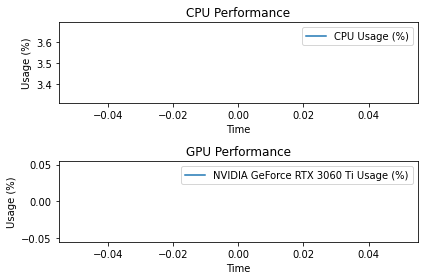

In [ ]:
#!python -m spacy download en_core_web_sm
print(df['processed_message'][100])
import psutil
import GPUtil
import matplotlib.pyplot as plt

def get_cpu_info():
    # Get CPU usage percentage
    cpu_percent = psutil.cpu_percent(interval=1)
    # Get CPU temperature if available
    try:
        cpu_temp = psutil.sensors_temperatures()['cpu-thermal'][0].current
    except KeyError:
        cpu_temp = None
    return cpu_percent, cpu_temp

def get_gpu_info():
    # Get GPU usage percentage
    gpus = GPUtil.getGPUs()
    gpu_info = []
    for gpu in gpus:
        gpu_info.append((gpu.name, gpu.load * 100, gpu.temperature))
    return gpu_info

def plot_performance(cpu_percent, cpu_temp, gpu_info):
    # Plot CPU performance
    plt.subplot(2, 1, 1)
    plt.plot(cpu_percent, label='CPU Usage (%)')
    plt.xlabel('Time')
    plt.ylabel('Usage (%)')
    plt.title('CPU Performance')
    plt.legend()

    # Plot GPU performance
    plt.subplot(2, 1, 2)
    for name, load, temp in gpu_info:
        plt.plot(load, label=f'{name} Usage (%)')
    plt.xlabel('Time')
    plt.ylabel('Usage (%)')
    plt.title('GPU Performance')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
cpu_percent, cpu_temp = get_cpu_info()
gpu_info = get_gpu_info()
plot_performance(cpu_percent, cpu_temp, gpu_info)


In [ ]:
#!python -m spacy download en_core_web_lg
print(df['processed_message'][1000])

way ab kill rigor workout yesterday


In [ ]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

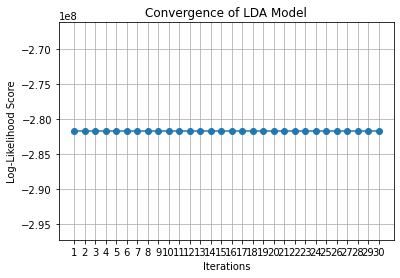

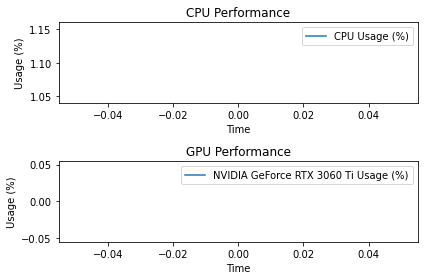

In [ ]:
# Train LDA model
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = vectorizer.fit_transform(train_df['processed_message'])
tf_test = vectorizer.transform(test_df['processed_message'])
lda_model = LatentDirichletAllocation(n_components=components, random_state=42)

# Training the model iteratively
num_iterations = 30
log_likelihoods = []
for _ in range(num_iterations):
    lda_model.fit(tf)
    # Compute log-likelihood score
    log_likelihood = lda_model.score(tf)
    log_likelihoods.append(log_likelihood)


# Plot the convergence
plt.plot(range(1, num_iterations + 1), log_likelihoods, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood Score')
plt.title('Convergence of LDA Model')
plt.xticks(range(1, num_iterations + 1))
plt.grid(True)
plt.show()

cpu_percent, cpu_temp = get_cpu_info()
gpu_info = get_gpu_info()
plot_performance(cpu_percent, cpu_temp, gpu_info)

In [ ]:
print(log_likelihoods)

[-281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453, -281724326.72134453]


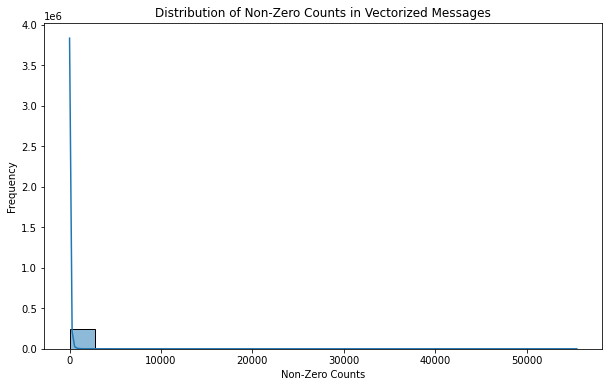

In [ ]:
#!pip install seaborn
import seaborn as sns
# Count non-zero elements in each row of the vectorized matrix
non_zero_counts = tf.getnnz(axis=1)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_counts, bins=20, kde=True)
plt.title('Distribution of Non-Zero Counts in Vectorized Messages')
plt.xlabel('Non-Zero Counts')
plt.ylabel('Frequency')
plt.show()


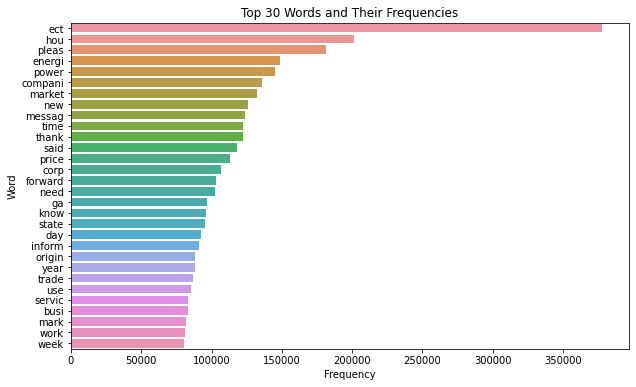

In [ ]:
import numpy as np

# Sum the counts of each word across all documents
word_frequencies = np.array(tf.sum(axis=0))[0]

# Get the feature names (words)
feature_names = vectorizer.get_feature_names()

# Create a dictionary to store word frequencies
word_freq_dict = dict(zip(feature_names, word_frequencies))

# Sort the dictionary by values (word frequencies)
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top N words and their frequencies
top_n = 30
top_words = [word[0] for word in sorted_word_freq[:top_n]]
top_word_freq = [word[1] for word in sorted_word_freq[:top_n]]

# Plot the top N words and their frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_word_freq, y=top_words)
plt.title(f'Top {top_n} Words and Their Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


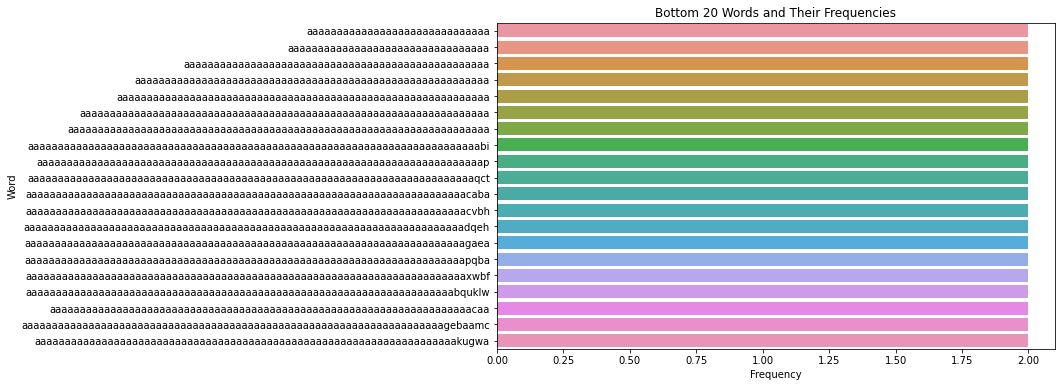

In [ ]:
# Reverse the sorting order of the word frequencies
sorted_word_freq_reverse = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=False)

# Extract the bottom N words and their frequencies
bottom_n = 20
bottom_words = [word[0] for word in sorted_word_freq_reverse[:bottom_n]]
bottom_word_freq = [word[1] for word in sorted_word_freq_reverse[:bottom_n]]

# Plot the bottom N words and their frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_word_freq, y=bottom_words)
plt.title(f'Bottom {bottom_n} Words and Their Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


In [ ]:
# Display topics and associated words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Display topics and associated words after the last iteration
no_top_words = 20
feature_names = vectorizer.get_feature_names()
display_topics(lda_model, feature_names, no_top_words)

Topic 1:
pleas thank messag need origin attach inform deal know forward agreement chang use contract trade let ga sent question follow

Topic 2:
ee jeff energi richard gov jame steve org dasovich susan ferc william john steven robert steff paul cpuc joe error

Topic 3:
font imag schedul size align gif width href class type fantasi nbsp updat final tabl face sportslin arial right player

Topic 4:
power compani energi said market state price new california electr year busi ga gener util million servic rate time trade

Topic 5:
ect hou corp ee john mark develop david forward enronxg pleas commun robert mari michael scott mike smith jone chri

Topic 6:
time messag know pleas like day work week origin edu want good thank look email make year new think aol



In [ ]:
log_likelihood = lda_model.score(tf)
print("Log Likelihood:", log_likelihood)

Log Likelihood: -281724326.72134453


In [ ]:
#!pip install wordcloud


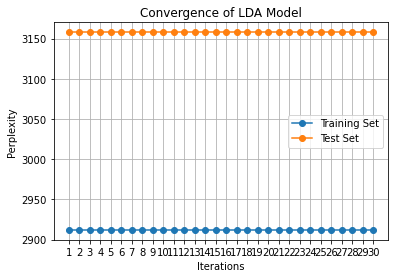

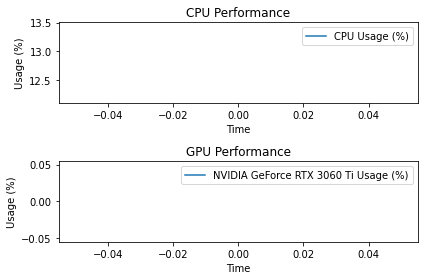

In [ ]:
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt

# Generate word clouds for each topic
#ffor topic_idx, topic in enumerate(lda_model.components_):
 #   word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]}
  #  wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/path/to/your/truetype/font').generate_from_frequencies(word_freq)
   # plt.figure(figsize=(10, 5))
    #plt.imshow(wordcloud, interpolation='bilinear')
    #plt.title(f"Topic {topic_idx + 1}")
    #plt.axis('off')
   # lt.show()


# Training the model iteratively
num_iterations = 30
train_perplexities = []
test_perplexities = []

for _ in range(num_iterations):
    lda_model.fit(tf)

    # Compute perplexity on the training set
    train_perplexity = lda_model.perplexity(tf)
    train_perplexities.append(train_perplexity)

    # Compute perplexity on the test set
    test_perplexity = lda_model.perplexity(tf_test)
    test_perplexities.append(test_perplexity)


# Plot the convergence using perplexity for both training and test sets
plt.plot(range(1, num_iterations + 1), train_perplexities, marker='o', label='Training Set')
plt.plot(range(1, num_iterations + 1), test_perplexities, marker='o', label='Test Set')
plt.xlabel('Iterations')
plt.ylabel('Perplexity')
plt.title('Convergence of LDA Model')
plt.xticks(range(1, num_iterations + 1))
plt.legend()
plt.grid(True)
plt.show()

cpu_percent, cpu_temp = get_cpu_info()
gpu_info = get_gpu_info()
plot_performance(cpu_percent, cpu_temp, gpu_info)

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

train_perplexity = lda_model.perplexity(tf)
test_perplexity = lda_model.perplexity(tf_test)

print(f"Perplexity on training set: {train_perplexity}")
print(f"Perplexity on test set: {test_perplexity}")

panel = pyLDAvis.sklearn.prepare(lda_model, tf, vectorizer, mds='tsne')
pyLDAvis.display(panel)

Perplexity on training set: 2912.0228858123833
Perplexity on test set: 3157.962152954648


/local/data1/text_mining/mail_env/lib64/python3.6/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
print(torch.__version__)
print(torch.cuda.is_available())

cpu
1.9.0+cpu
False


Batches:   0%|          | 0/7500 [00:00<?, ?it/s]

Batches:   0%|          | 0/1875 [00:00<?, ?it/s]

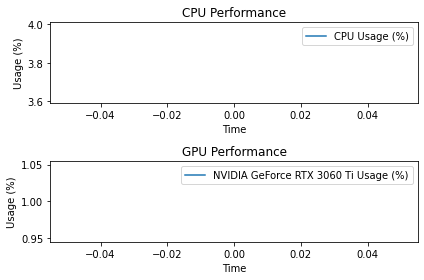

In [ ]:
# Use BERT for embedding the text
import numpy as np
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
train_embeddings = bert_model.encode(train_df['processed_message'], show_progress_bar=True)
np.save('train_embeddings.npy', train_embeddings)
embeddings_loaded = np.load('train_embeddings.npy')
test_embeddings = bert_model.encode(test_df['processed_message'], show_progress_bar=True)

cpu_percent, cpu_temp = get_cpu_info()
gpu_info = get_gpu_info()
plot_performance(cpu_percent, cpu_temp, gpu_info)

Silhouette Score: 0.052065883


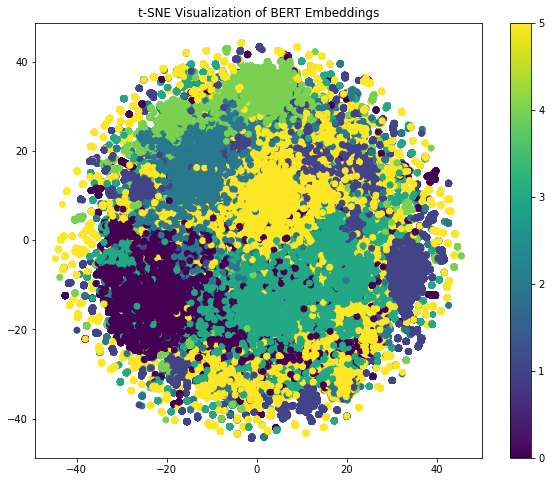

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
#import umap.umap_ as umap
import matplotlib.pyplot as plt
# Perform clustering
kmeans = KMeans(n_clusters=6)
cluster_labels = kmeans.fit_predict(embeddings_loaded)

#Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(embeddings_loaded, cluster_labels)
print("Silhouette Score:", silhouette_avg)
#similarity_matrix = cosine_similarity(train_embeddings[:,:], train_embeddings[:,:])
#plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
#plt.title('Cosine Similarity between Emails')
#plt.colorbar()
#plt.show()
from sklearn.manifold import TSNE

# Use t-SNE to visualize BERT embeddings in 2D space
tsne_model = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne_model.fit_transform(embeddings_loaded)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of BERT Embeddings')
plt.colorbar()
plt.show()
plt.savefig('my_plot.png')

In [ ]:
# Predict labels tarin_df using LDA model
#lda_train_labels = lda_model.transform(tf).argmax(axis=1)
#print("Classification Report for LDA Model on Training Set:")
lda_train_probs = lda_model.transform(tf)
lda_train_labels = lda_train_probs.argmax(axis=1)
lda_train_confidences = lda_train_probs.max(axis=1)
print("Classification Report for LDA Model on Training Set:")
train_df['lda_label'] = lda_train_labels

Classification Report for LDA Model on Training Set:


/local/data1/text_mining/mail_env/lib64/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Train Random Forest classifier on BERT embeddings with predicted LDA labels
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(embeddings_loaded, train_df['lda_label'])


RandomForestClassifier(random_state=42)

In [ ]:
# Predict labels traf_df using BERT-based classifier
bert_train_probs = rf_classifier.predict_proba(embeddings_loaded)
bert_train_labels = rf_classifier.predict(embeddings_loaded)
bert_train_confidences = bert_train_probs.max(axis=1)
train_df['bert_label'] = bert_train_labels

/local/data1/text_mining/mail_env/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Predict labels test_df using LDA and BERT classifiers
#lda_test_labels = lda_model.transform(vectorizer.transform(test_df['processed_message'])).argmax(axis=1)
lda_test_probs = lda_model.transform(vectorizer.transform(test_df['processed_message']))
lda_test_labels = lda_test_probs.argmax(axis=1)
lda_test_confidences = lda_test_probs.max(axis=1)

test_df['lda_label'] = lda_test_labels

bert_test_probs = rf_classifier.predict_proba(test_embeddings)
bert_test_labels = rf_classifier.predict(test_embeddings)
bert_test_confidences = bert_test_probs.max(axis=1)
test_df['bert_label'] = bert_test_labels

/local/data1/text_mining/mail_env/lib64/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/local/data1/text_mining/mail_env/lib64/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
from sklearn.metrics import classification_report

# Ensemble using Voting Mechanism with Confidence
final_train_labels = []

for lda_label, bert_label, lda_confidence, bert_confidence in zip(
    lda_train_labels, bert_train_labels, lda_train_confidences,bert_train_confidences
):
    # Use a voting mechanism based on confidence scores
    if lda_label == bert_label:
        final_train_labels.append(lda_label)
    elif lda_confidence > bert_confidence:
        final_train_labels.append(lda_label)
    else:
        final_train_labels.append(bert_label)

# Add final label decision column to the DataFrame
train_df['final_label_decision'] = final_train_labels

# Display classification report for final label decision
print("Classification Report for Ensemble Model on Training Set:")
print(classification_report(train_df['lda_label'], train_df['final_label_decision']))


/local/data1/text_mining/mail_env/lib64/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Classification Report for Ensemble Model on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106350
           1       0.99      1.00      1.00     15715
           2       1.00      1.00      1.00      8065
           3       1.00      0.99      1.00     22730
           4       1.00      1.00      1.00     28439
           5       1.00      1.00      1.00     58701

    accuracy                           1.00    240000
   macro avg       1.00      1.00      1.00    240000
weighted avg       1.00      1.00      1.00    240000



In [ ]:
# Ensemble using Voting Mechanism with Confidence
final_test_labels = []

for lda_label, bert_label, lda_confidence, bert_confidence in zip(
    lda_test_labels, bert_test_labels, lda_test_confidences, bert_test_confidences
):
    # Use a voting mechanism based on confidence scores
    if lda_label == bert_label:
        final_test_labels.append(lda_label)
    elif bert_confidence > lda_confidence:
        final_test_labels.append(bert_label)
    else:
        final_test_labels.append(lda_label)

# Add final label decision column to the DataFrame
test_df['final_label_decision'] = final_test_labels

# Display classification report for final label decision on the test set
print("Classification Report for Ensemble Model on Test Set:")
print(classification_report(test_df['lda_label'], test_df['final_label_decision']))

Classification Report for Ensemble Model on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26513
           1       0.98      0.91      0.95      3987
           2       1.00      0.96      0.98      2029
           3       0.99      0.92      0.95      5720
           4       0.99      0.94      0.96      7201
           5       0.97      0.97      0.97     14550

    accuracy                           0.97     60000
   macro avg       0.98      0.95      0.96     60000
weighted avg       0.97      0.97      0.97     60000



/local/data1/text_mining/mail_env/lib64/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
# Add final label decision column to the DataFrame
train_df['final_label_decision'] = final_train_labels
test_df['final_label_decision'] = final_test_labels

/local/data1/text_mining/mail_env/lib64/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/local/data1/text_mining/mail_env/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Calculate accuracy
train_accuracy_bert = accuracy_score(train_df['bert_label'], train_df['final_label_decision'])
train_accuracy_lda = accuracy_score(train_df['lda_label'], train_df['final_label_decision'])
test_accuracy_bert = accuracy_score(test_df['bert_label'], test_df['final_label_decision'])
test_accuracy_lda = accuracy_score(test_df['lda_label'], test_df['final_label_decision'])

print("Train Accuracy BERT:", train_accuracy_bert)
print("Test Accuracy BERT:", test_accuracy_bert)
print("Train Accuracy LDA:", train_accuracy_lda)
print("Test Accuracy LDA:", test_accuracy_lda)


Train Accuracy BERT: 0.9997
Test Accuracy BERT: 0.9256166666666666
Train Accuracy LDA: 0.9990041666666667
Test Accuracy LDA: 0.9659833333333333


In [ ]:
def display_topics_with_labels(model, feature_names, no_top_words, final_labels):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1} ({final_labels[topic_idx]}):")
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(" ".join(top_words))
        print()

# Assuming final_decision_labels contains the final label decisions
# Display topics and associated words after the last iteration with final decision labels
no_top_words = 20
feature_names = vectorizer.get_feature_names()
display_topics_with_labels(lda_model, feature_names, no_top_words, final_train_labels)


Topic 1 (0):
pleas thank messag need origin attach inform deal know forward agreement chang use contract trade let ga sent question follow

Topic 2 (4):
ee jeff energi richard gov jame steve org dasovich susan ferc william john steven robert steff paul cpuc joe error

Topic 3 (3):
font imag schedul size align gif width href class type fantasi nbsp updat final tabl face sportslin arial right player

Topic 4 (5):
power compani energi said market state price new california electr year busi ga gener util million servic rate time trade

Topic 5 (5):
ect hou corp ee john mark develop david forward enronxg pleas commun robert mari michael scott mike smith jone chri

Topic 6 (0):
time messag know pleas like day work week origin edu want good thank look email make year new think aol



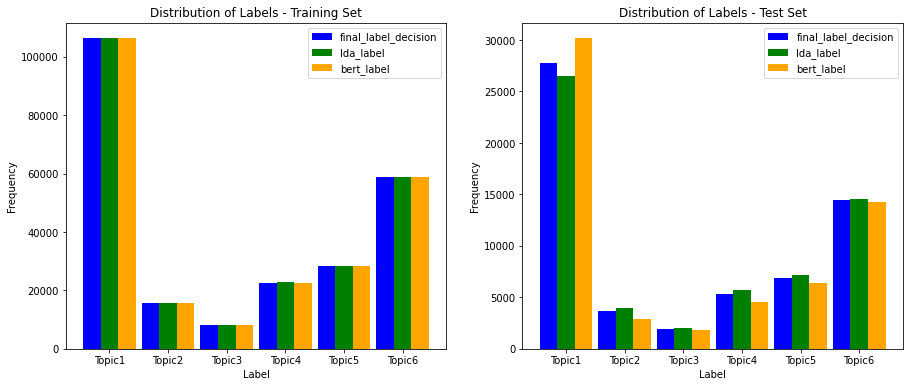

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Create a list of names corresponding to each topic index
topic_names = ['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5' ,'Topic6']

# Create a dictionary to map topic index to topic name
topic_name_dict = {i: name for i, name in enumerate(topic_names)}

# Get the unique labels from the final decision, lda, and bert
unique_labels = sorted(train_df['final_label_decision'].unique())

# Define the width of each bar
bar_width = 0.3

# Define the positions for the bars
positions = range(len(unique_labels))

# Define colors for the bars
colors = ['blue', 'green', 'orange']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for training set
for i, label in enumerate(['final_label_decision', 'lda_label', 'bert_label']):
    label_counts = train_df[label].value_counts().reindex(unique_labels, fill_value=0)
    ax1.bar([p + i * bar_width for p in positions], label_counts, width=bar_width, label=label, color=colors[i])

ax1.set_xlabel('Label')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Labels - Training Set')
ax1.set_xticks([p + bar_width for p in positions])
ax1.set_xticklabels([topic_name_dict.get(label, 'Unknown') for label in unique_labels])  # Use get method with default value
ax1.legend()

# Plot for test set
for i, label in enumerate(['final_label_decision', 'lda_label', 'bert_label']):
    label_counts = test_df[label].value_counts().reindex(unique_labels, fill_value=0)
    ax2.bar([p + i * bar_width for p in positions], label_counts, width=bar_width, label=label, color=colors[i])

ax2.set_xlabel('Label')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Labels - Test Set')
ax2.set_xticks([p + bar_width for p in positions])
ax2.set_xticklabels([topic_name_dict.get(label, 'Unknown') for label in unique_labels])  # Use get method with default value
ax2.legend()

# Show the plot
plt.show()
plt.savefig('my_plot1.png')

In [ ]:
#Topic 1: Business Operations and Management Services
#Topic 2: Trends in Power and Energy Markets
#Topic 3: Communication among Enron Staff
#Topic 4: Issues with Fonts and Formatting
#Topic 5: Topics Related to Leisure and Entertainment
#Topic 6: Requests and Attachments in Communication
#Topic 7: unknown
#label_1000 = df.loc[1000, 'final_label_decision']
print(df.columns)


Index(['message', 'file', 'cleaned_message', 'processed_message'], dtype='object')


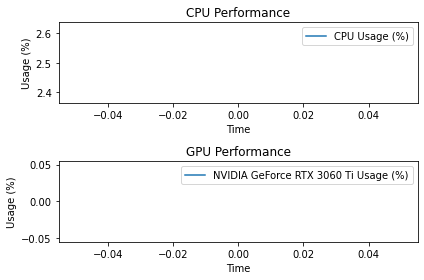

In [ ]:
!pip install psutil
!pip install gputil

import psutil
import GPUtil
import matplotlib.pyplot as plt

def get_cpu_info():
    # Get CPU usage percentage
    cpu_percent = psutil.cpu_percent(interval=1)
    # Get CPU temperature if available
    try:
        cpu_temp = psutil.sensors_temperatures()['cpu-thermal'][0].current
    except KeyError:
        cpu_temp = None
    return cpu_percent, cpu_temp

def get_gpu_info():
    # Get GPU usage percentage
    gpus = GPUtil.getGPUs()
    gpu_info = []
    for gpu in gpus:
        gpu_info.append((gpu.name, gpu.load * 100, gpu.temperature))
    return gpu_info

def plot_performance(cpu_percent, cpu_temp, gpu_info):
    # Plot CPU performance
    plt.subplot(2, 1, 1)
    plt.plot(cpu_percent, label='CPU Usage (%)')
    plt.xlabel('Time')
    plt.ylabel('Usage (%)')
    plt.title('CPU Performance')
    plt.legend()

    # Plot GPU performance
    plt.subplot(2, 1, 2)
    for name, load, temp in gpu_info:
        plt.plot(load, label=f'{name} Usage (%)')
    plt.xlabel('Time')
    plt.ylabel('Usage (%)')
    plt.title('GPU Performance')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
cpu_percent, cpu_temp = get_cpu_info()
gpu_info = get_gpu_info()
plot_performance(cpu_percent, cpu_temp, gpu_info)
